In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')
df1 = pd.DataFrame(df)
df1.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,166,3712,3494,52,189,3744,3503,52,35
1,1,Andhra Pradesh,70357,646530,570667,5506,69353,654385,579474,5558,28
2,3,Arunachal Pradesh,2216,8133,5903,14,2331,8416,6071,14,12
3,4,Assam,30182,163491,132712,597,29830,165582,135144,608,18
4,5,Bihar,12958,172854,159022,874,13015,174071,160178,878,10


In [57]:
df2 = df1.iloc[:-1,1:-1]
df2.tail()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death
31,Telengana,30037,179246,148139,1070,30387,181627,150160,1080
32,Tripura,6551,23789,16978,260,6378,24130,17487,265
33,Uttarakhand,11867,43720,31324,529,11507,44404,32355,542
34,Uttar Pradesh,61698,369686,302689,5299,61300,374277,307611,5366
35,West Bengal,25101,234673,205028,4544,25221,237869,208042,4606


In [58]:
df2.columns

Index(['state_name', 'active', 'positive', 'cured', 'death', 'new_active',
       'new_positive', 'new_cured', 'new_death'],
      dtype='object')

In [59]:
total_states = np.arange(len(df2['state_name']))
total_states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [60]:
df3 = df2.set_index('state_name',drop=True)
df3.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death
state_name,,,,,,,,
Andaman and Nicobar Islands,166,3712,3494,52,189,3744,3503,52
Andhra Pradesh,70357,646530,570667,5506,69353,654385,579474,5558
Arunachal Pradesh,2216,8133,5903,14,2331,8416,6071,14
Assam,30182,163491,132712,597,29830,165582,135144,608
Bihar,12958,172854,159022,874,13015,174071,160178,878


In [61]:
act = df3.loc['West Bengal']['active']
act

25101

In [62]:
act1 = df3.loc['Maharashtra']['active']
act1

273883

In [63]:
act2 = df3.loc['Manipur']['active']
act2

2206

<IPython.core.display.Javascript object>


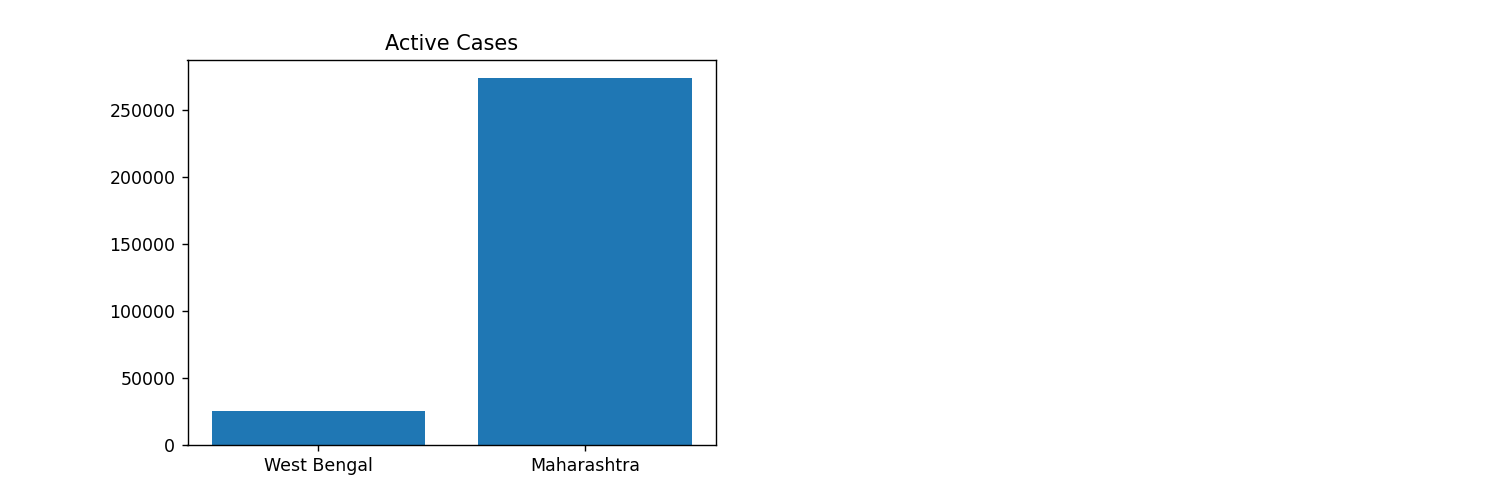

In [64]:
%matplotlib notebook

names = ['West Bengal', 'Maharashtra']
values = act, act1
 
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.bar(names, values)

plt.title('Active Cases')
plt.show()

<IPython.core.display.Javascript object>


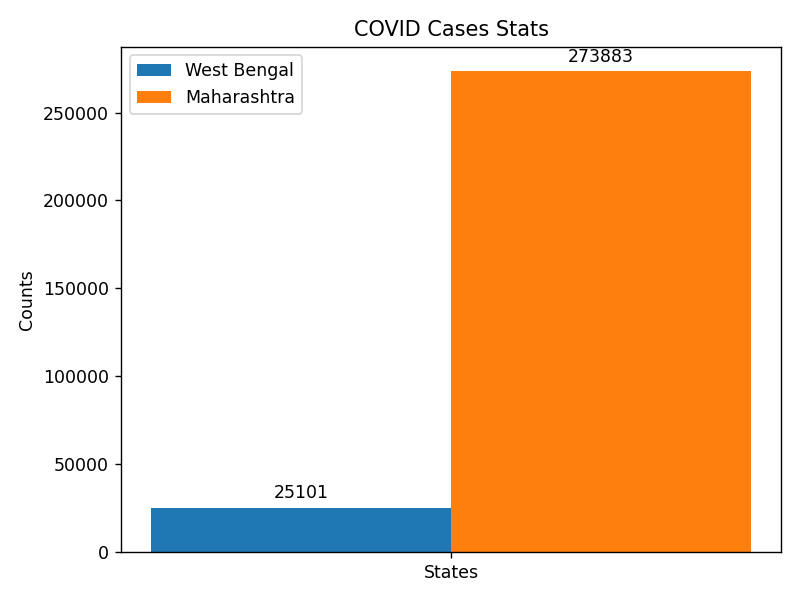

In [65]:
%matplotlib notebook

labels = ["States"]
st1 = act
st2 = act1
 
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, st1, width, label='West Bengal')
rects2 = ax.bar(x + width/2, st2, width, label='Maharashtra')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('COVID Cases Stats')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
 
 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
 
 
autolabel(rects1)
autolabel(rects2) 
 
fig.tight_layout()
 
plt.show()

<IPython.core.display.Javascript object>


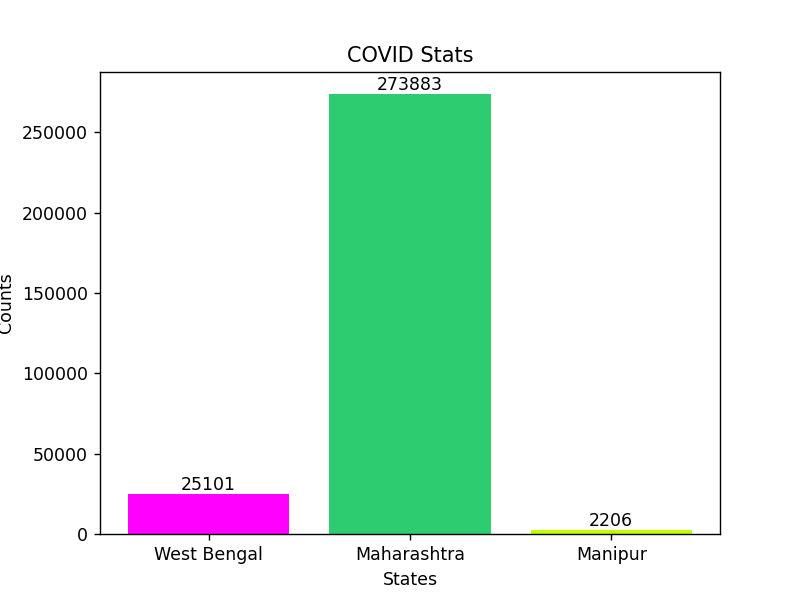

In [66]:
%matplotlib notebook

names = ['West Bengal', 'Maharashtra', 'Manipur']
values = act, act1, act2
x_pos = [i for i, n in enumerate(names)]
 
fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, values, color=['#FF00FF','#2ECC71','#BFFF00'])
 
plt.xlabel("States")
plt.ylabel("Counts")
plt.title("COVID Stats")
plt.xticks(x_pos, names)
#plt.minorticks_on()
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
 
 
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                int(height),ha='center', va='bottom')
        
        
autolabel(rects1)
 
plt.show()

In [67]:
act3 = df3.loc[['Uttarakhand','Kerala','Maharashtra','West Bengal']]['active']
act3

state_name
Uttarakhand     11867
Kerala          42858
Maharashtra    273883
West Bengal     25101
Name: active, dtype: int64

In [68]:
act4 = df3.loc[['Madhya Pradesh','Manipur','Assam','Nagaland']]['active']
act4

state_name
Madhya Pradesh    22812
Manipur            2206
Assam             30182
Nagaland           1119
Name: active, dtype: int64

In [69]:
grp = df3.loc[['Madhya Pradesh','Manipur','Assam','Nagaland']]
grp

,active,positive,cured,death,new_active,new_positive,new_cured,new_death
state_name,,,,,,,,
Madhya Pradesh,22812,113057,88168,2077,22744,115361,90495,2122
Manipur,2206,9376,7108,62,2106,9537,7369,62
Assam,30182,163491,132712,597,29830,165582,135144,608
Nagaland,1119,5671,4536,16,1088,5730,4626,16


<IPython.core.display.Javascript object>


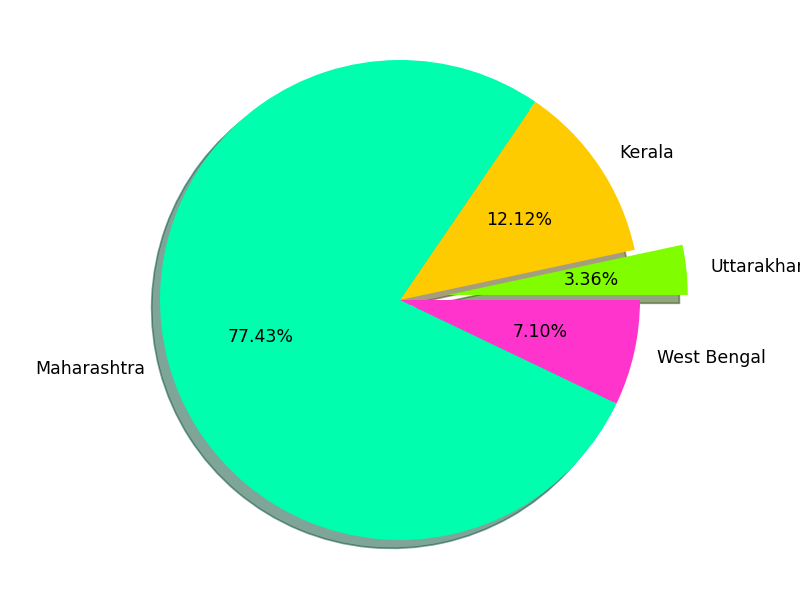

In [70]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

st = ['Uttarakhand','Kerala','Maharashtra','West Bengal']
explode = (0.2, 0, 0, 0)
case = act3
ax.pie(case, labels=st, autopct='%1.2f%%', colors=['#80FE00','#FECB00','#00FEAF','#FE34CD'], explode=explode, shadow=True)

plt.show()

<IPython.core.display.Javascript object>


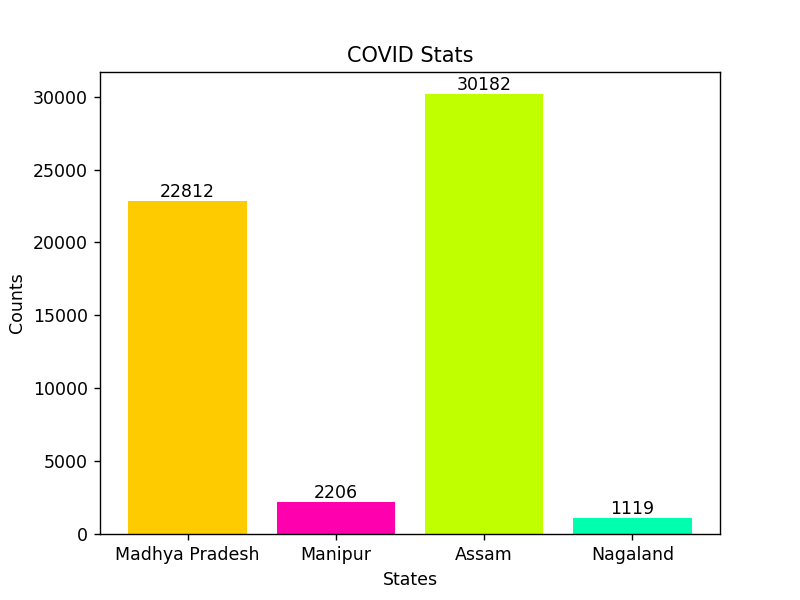

In [71]:
%matplotlib notebook

names = ['Madhya Pradesh','Manipur','Assam','Nagaland']
values = act4
x_pos = [i for i, n in enumerate(names)]
 
fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, values, color=['#FECB00','#FF00AF','#BFFF00','#00FEAF'])
 
plt.xlabel("States")
plt.ylabel("Counts")
plt.title("COVID Stats")
plt.xticks(x_pos, names)
#plt.minorticks_on()
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
 
 
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                int(height),ha='center', va='bottom')
        
        
autolabel(rects1)
 
plt.show()

In [72]:
wb = df3.loc['West Bengal']
wb

active           25101
positive        234673
cured           205028
death             4544
new_active       25221
new_positive    237869
new_cured       208042
new_death         4606
Name: West Bengal, dtype: int64

<IPython.core.display.Javascript object>


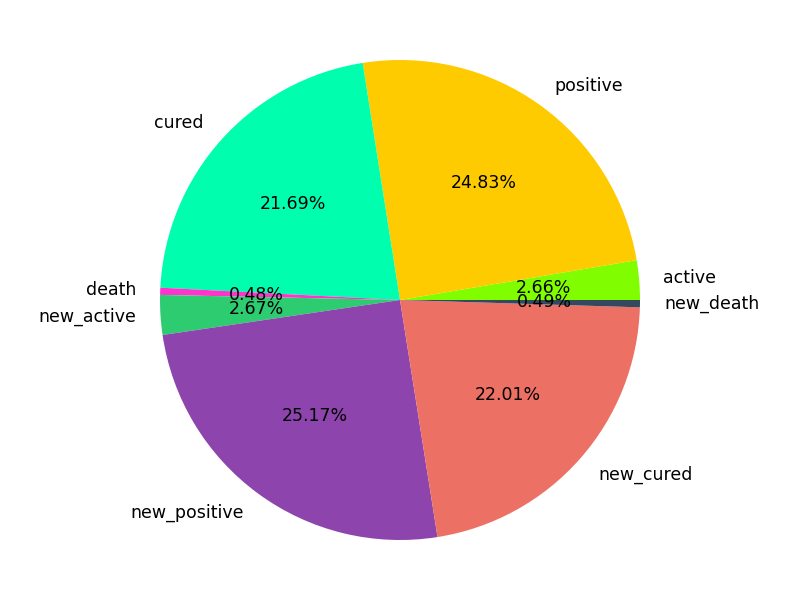

In [73]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

col = dict(wb)

ax.pie(wb, labels = col,autopct='%1.2f%%',
       colors=['#80FE00','#FECB00','#00FEAF','#FE34CD','#2ECC71','#8E44AD','#EC7063','#34495E'])
plt.show() 

<IPython.core.display.Javascript object>


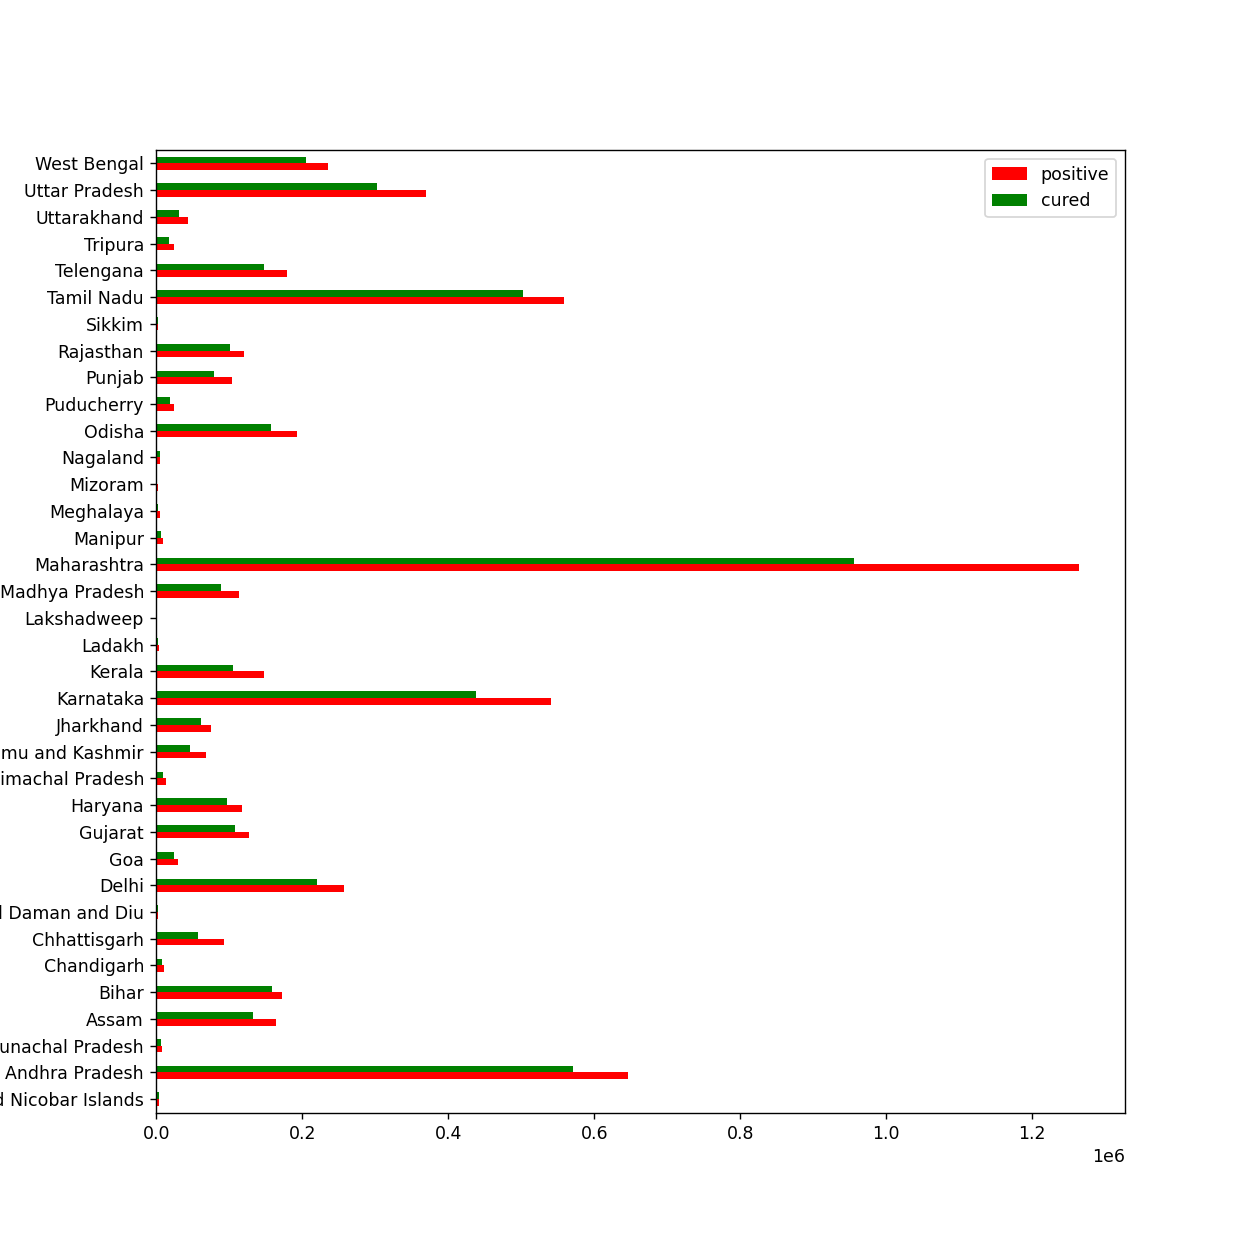

<AxesSubplot:ylabel='state_name'>

In [98]:
%matplotlib notebook

df4 = df3.iloc[:,1:3]
df4.plot.barh(color={"cured": "green", "positive": "red"},figsize=(10,10))

<IPython.core.display.Javascript object>


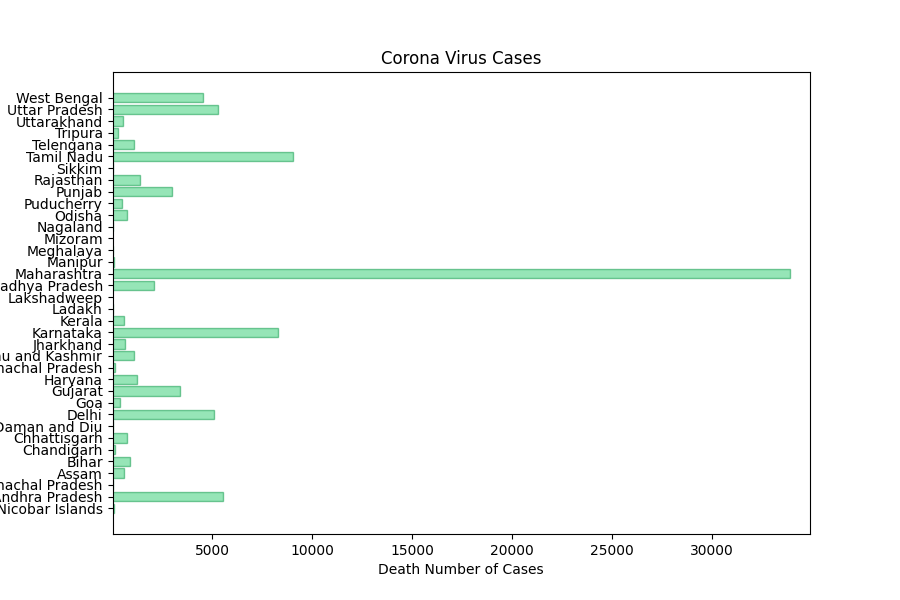

In [96]:
from matplotlib.pyplot import figure
%matplotlib notebook

figure(figsize=(9, 6), dpi=80)
plt.barh(total_states,df3['death'], align='center', alpha=0.5,  
                 color='#2ECC71', edgecolor='#059643')
    
plt.yticks(total_states, df2['state_name'])  
plt.xlim(1,max(df3['death'])+1000) 
plt.xlabel('Death Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show() 

In [76]:
import seaborn as sns

In [77]:
corr = df3.corr()
corr

,active,positive,cured,death,new_active,new_positive,new_cured,new_death
active,1.000000,0.943372,0.911297,0.960959,0.999920,0.944224,0.912539,0.961127
positive,0.943372,1.000000,0.996260,0.929305,0.941888,0.999993,0.996508,0.928819
cured,0.911297,0.996260,1.000000,0.901875,0.909493,0.996039,0.999993,0.901229
death,0.960959,0.929305,0.901875,1.000000,0.960014,0.929642,0.902626,0.999996
new_active,0.999920,0.941888,0.909493,0.960014,1.000000,0.942776,0.910745,0.960184
new_positive,0.944224,0.999993,0.996039,0.929642,0.942776,1.000000,0.996299,0.929162
new_cured,0.912539,0.996508,0.999993,0.902626,0.910745,0.996299,1.000000,0.901988
new_death,0.961127,0.928819,0.901229,0.999996,0.960184,0.929162,0.901988,1.000000


<IPython.core.display.Javascript object>


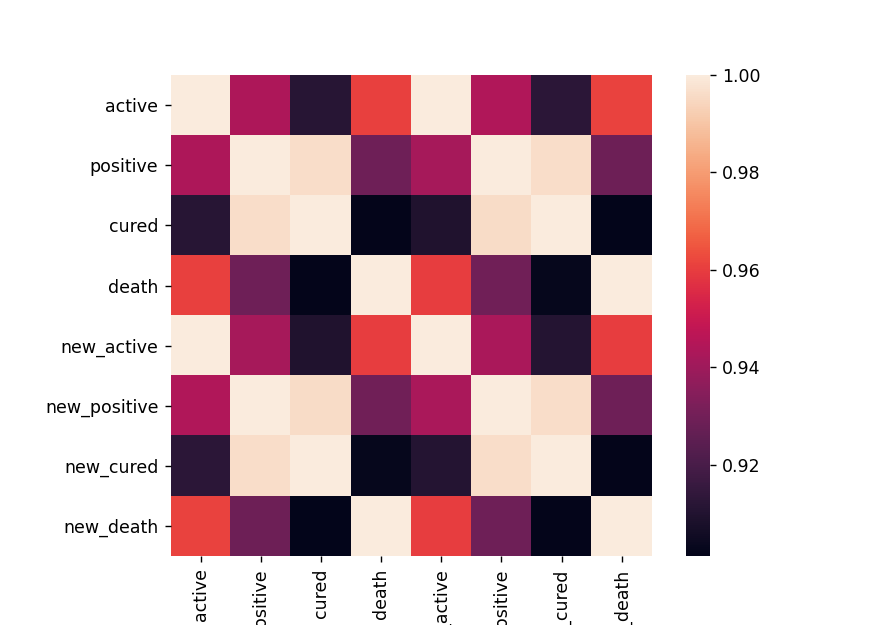

<AxesSubplot:>

In [92]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

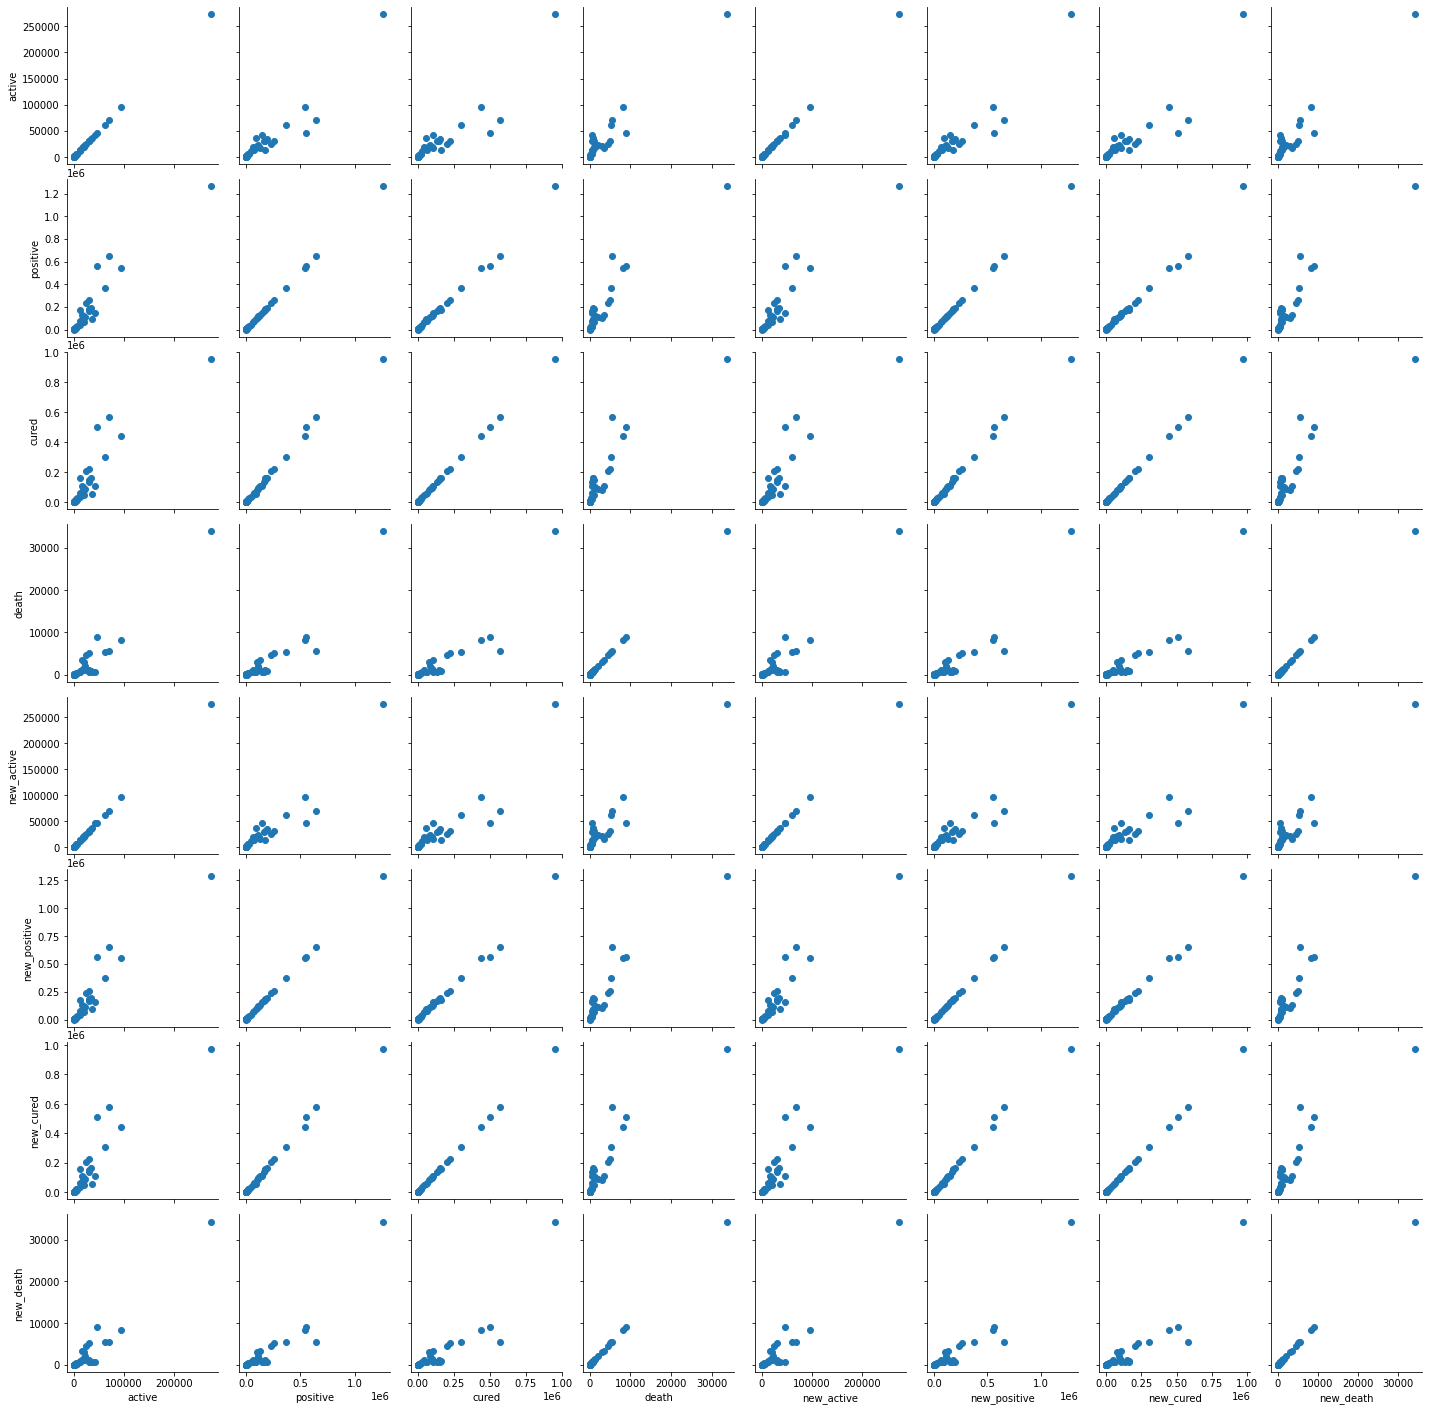

In [95]:
g = sns.PairGrid(df3)
g.map(plt.scatter);